In [1]:
%run MCTS.ipynb
%run Deck.ipynb
%run Board.ipynb

In [2]:
from tensorflow.keras.models import load_model

In [3]:
model = load_model("models/latest.h5")

In [4]:
new_board = Board(deck)
root = MonteCarloTreeSearchNode(model, new_board, prior=0)

In [7]:
def play(root, player = 1):
    
    while not root.board.is_game_over():
        
        if root.board.player == 1:
            
            print("-------- Qu'elle action choississez vous ? --------")
            
            if not root.children:
                root.simulate(1)
            
            fig, ax = plt.subplots(figsize=(16,5), nrows=1, ncols=len(root.children))

            for row, action in zip(ax, root.children):
                row.imshow(np.rot90(np.rot90(root.children[action].board.board_2D)))
                row.title.set_text(action)

            plt.show()
            
            action_choosed = int(input("Choix de l'action :"))
            while action_choosed not in root.children:
                action_choosed = int(input("Veuillez choisir une action possible :"))
                
            root = root.children[action_choosed]
                
        else:
            
            print("L'ordinateur à joué:")
            
            root.simulate(1) # play 1 simulation is equivalent to play the one with the highest prior
            root = root.best_child()
            plt.figure(figsize=(4,4))
            plt.imshow(root.board.board_2D)
            plt.show()
            
    print(f"Player {root.board.player*-1} won !")

-------- Qu'elle action choississez vous ? --------


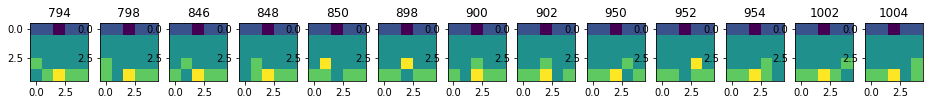

Choix de l'action :848
L'ordinateur à joué:
0


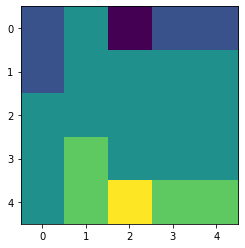

-------- Qu'elle action choississez vous ? --------
0


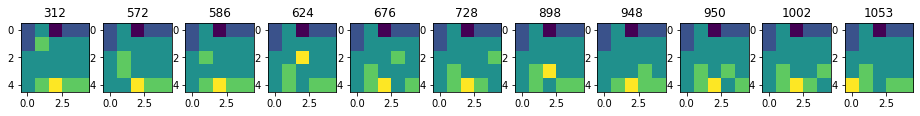

Choix de l'action :948
L'ordinateur à joué:
0


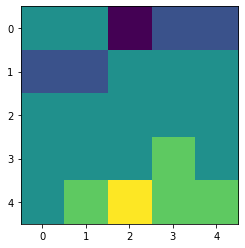

-------- Qu'elle action choississez vous ? --------
0


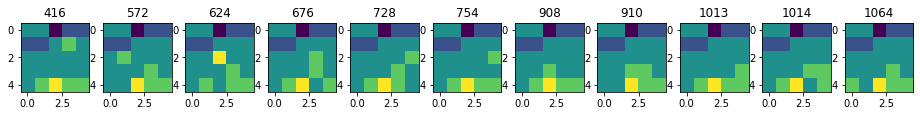

Choix de l'action :910
L'ordinateur à joué:
0


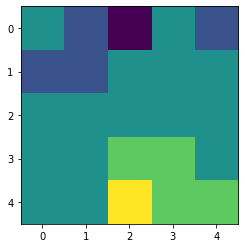

-------- Qu'elle action choississez vous ? --------
0


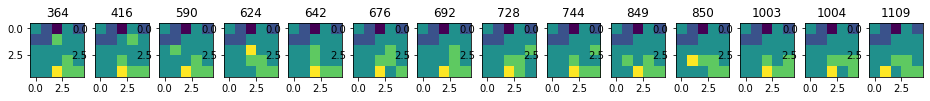

Choix de l'action :642
L'ordinateur à joué:
0


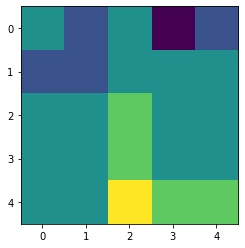

-------- Qu'elle action choississez vous ? --------
0


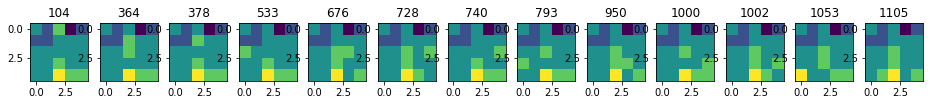

Choix de l'action :676
L'ordinateur à joué:
0


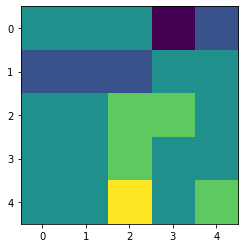

-------- Qu'elle action choississez vous ? --------
0


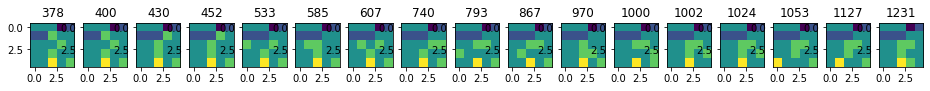

Choix de l'action :400
L'ordinateur à joué:
0


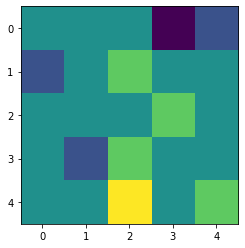

-------- Qu'elle action choississez vous ? --------
0


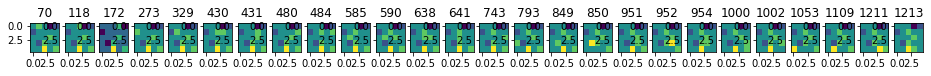

Choix de l'action :172
Player -1 à gagné !


In [8]:
play(root , 1)